Martín Amado - 19020
Juan Pablo Pineda - 19087
Laura Tamath - 19365

referencia para análisis de datos: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#4.-Missing-data

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.stats.diagnostic as diag
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
import sklearn.preprocessing
import random
import graphviz
## import pyclustertend 
from sklearn.cluster import Birch
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

## Análisis  exploratorio
Explicación de hallazgos y conclusiones -Laura

In [31]:
data = pd.read_csv('./train.csv', encoding = 'latin1')
file = open('cuantitativas.txt', 'r')
quant= file.read().splitlines()
file = open('cualitativas.txt', 'r')
quali= file.read().splitlines()

In [ ]:
#Variables cuantitativas
data[quant].describe()

In [ ]:
for var in quant:
    localData = data[var].dropna(how='all', axis=0)
  
    sns.displot(localData, kde=True)

    print( var, ':', ' Kurtosis:', stats.kurtosis(localData), 'Asimetría:', stats.skew(localData), '\n')

In [ ]:
#Variables cualitativas
for var in quali:
  data[var].value_counts().plot(kind='barh')
  plt.figure(figsize=(20,5))
  print(var)
  plt.show()

In [ ]:
# Variables de interes
print('\033[36m' + 'Kurtosis: %f' % data['SalePrice'].kurt())
print('\033[36m' + 'Asimetría: %f' % data['SalePrice'].skew())
data['SalePrice'].describe()

In [ ]:
stat,p = stats.shapiro(data[['SalePrice']].dropna())
print('Prueba de Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(data[['SalePrice']].dropna())
print('Prueba de Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

In [ ]:
sns.displot(data['SalePrice'], kde=True)

In [ ]:
sns.boxplot(x=data["SalePrice"])

In [ ]:
k = 11
corrmat = data.corr()
columns = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [ ]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[columns], height= 3)
plt.show()

### Análisis
Algo muy importante que se pudo notar, es que las variables toman en cuenta los cuartos sobre la tierra, no los que están en un nivel inferior, esto da paso a que se deduzca que la cantidad de los sótanos no son tan relecantes a comparación de los cuartos sobre la tierra. También es imporante mencionar que son pocas las variables que utilizan un valor numérico que puede convertirse a una cantidad monetaria. Sin embargo, la mayoría de las variables no se pueden clasificar como "mejor" o "peor" por ende, esto únicamente lo puede determinar la persona que quiere comprar un hogar. Y aunque es claro que existen variables que clasifican las paredes, la cimentación, los techos, entre otros; son estas a las que realemente hay que ponerles atención, ya que se pueden tomar en cuenta para estimar un valor a la propiedad. 
Las variables que más importancia tienen son las que nos indica si tiene características extras (con "extras" me refiero a las que no son indispensables para un hogar) como por ejemplo: garage extra, jardín, piscina, cancha, elevador, entre otros... ya que estas características pueden aumentar el precio de la vivienda de manera significativa. Pero esto no quiere decir que esta varible sea la única importante, ya que también hay que tomar en cuenta la calidad del hogar, la ubicación, el tipo de terreno, entre otras.


## Análisis de grupos
Explicación de las características - Laura

In [56]:
#cualitativa
groups = ['OverallQual', 'YearBuilt']
_lista = list(np.array(data[[ groups[0]]]))
group = list(data.groupby(by=groups[0]).groups.keys())
tags = []
number = {}
tagNo = {}

for i in range(len(group)): 
  number[group[i]] = i
  tagNo[i] = group[i]

for i in range(len(_lista)): tags.append(number[_lista[i][0]])

# Cuantitativa
columnsToUse = ["SalePrice", "GarageCars", "FullBath", "TotalBsmtSF", "GrLivArea"]
d_cluster = data[quant].fillna(0)
X_scale = sklearn.preprocessing.scale(d_cluster)

KeyError: "['SalePrice'] not in index"

## Variable respuesta
permite clasificar las casas  en Económicas, Intermedias o Caras. -Pineda

## Entrenamiento y prueba
Descripción del criterio que se usó para crear los conjuntos: número de filas de cada uno, estratificado o no, balanceado o no, etc. -Pineda

# Árbol de clasificación
Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. - Martin

In [42]:
temp = data[quant]
temp = temp.dropna()
y = temp.pop("SalePrice")
quant.remove("SalePrice")
x = temp[quant]

random.seed(579)
len(x)

1195

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

In [44]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
arbol = arbol.fit(x_train, y_train)

In [ ]:
tree.plot_tree(arbol, feature_names=data.columns, filled=True)

In [55]:
y_pred = arbol.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.011142061281337047
Precision: 0.0004802612621265969
Recall: 0.011142061281337047


C:\Users\laury\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laury\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Árbol de regresión
para predecir el precio de las viviendas utilizando el conjunto 
de entrenamiento. Muestre el modelo gráficamente. 
El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. -Laura

In [47]:
regressionTree = DecisionTreeRegressor(max_depth=4, random_state=42) 
regressionTree = regressionTree.fit(x_train, y_train) 

[Text(0.5, 0.9, 'YearBuilt <= 2.5\nsquared_error = 6821301052.994\nsamples = 836\nvalue = 181073.514'),
 Text(0.25, 0.7, 'LotConfig <= 1413.0\nsquared_error = 2961449844.66\nsamples = 711\nvalue = 159390.975'),
 Text(0.125, 0.5, 'Alley <= 1050.5\nsquared_error = 1185066146.488\nsamples = 381\nvalue = 130651.701'),
 Text(0.0625, 0.3, 'YearRemodAdd <= 225.0\nsquared_error = 718230957.245\nsamples = 259\nvalue = 116569.371'),
 Text(0.03125, 0.1, 'squared_error = 633130435.123\nsamples = 46\nvalue = 91347.913'),
 Text(0.09375, 0.1, 'squared_error = 569562445.966\nsamples = 213\nvalue = 122016.258'),
 Text(0.1875, 0.3, 'Condition1 <= 1.5\nsquared_error = 861351170.589\nsamples = 122\nvalue = 160547.795'),
 Text(0.15625, 0.1, 'squared_error = 668244417.291\nsamples = 73\nvalue = 147987.521'),
 Text(0.21875, 0.1, 'squared_error = 563861739.468\nsamples = 49\nvalue = 179260.041'),
 Text(0.375, 0.5, 'YearRemodAdd <= 480.5\nsquared_error = 2957808167.024\nsamples = 330\nvalue = 192571.773'),
 Te

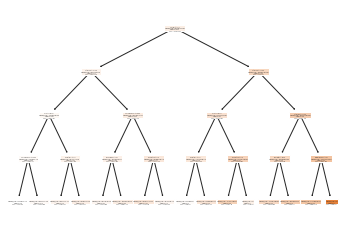

In [48]:
tree.plot_tree(regressionTree, feature_names=data.columns, filled=True)

### Análisis


## Determinar la eficiencia del algoritmo
para clasificar y predecir, en dependencia de las características de la variable respuesta.  -Martin

## Ánalisis de eficiencia
Usando una matriz de confusión para el árbol de clasificación. -Martin

## Análisis del desempeño del árbol de regresión 
-pineda

## Utilice random  forest
Explique  sus resultados comparando ambos algoritmos.  -Martin